In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from PIL import Image
from matplotlib.pyplot import imshow
from sklearn.model_selection import train_test_split
%matplotlib inline

## Input the data

In [3]:
train_file = "./data/train.csv"
test_file = "./data/test.csv"
train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)

In [4]:
print "Number of Columns:\n", train_data.shape[1], "\n\n"
print "List of Columns:\n", ", ".join(train_data.columns), "\n\n"
print "Data:\n", train_data.head(), "\n\n"
print "Size of train data(m):\n", train_data.shape[0]

Number of Columns:
132 


List of Columns:
Id, Prediction, NextId, Position, p_0_0, p_0_1, p_0_2, p_0_3, p_0_4, p_0_5, p_0_6, p_0_7, p_1_0, p_1_1, p_1_2, p_1_3, p_1_4, p_1_5, p_1_6, p_1_7, p_2_0, p_2_1, p_2_2, p_2_3, p_2_4, p_2_5, p_2_6, p_2_7, p_3_0, p_3_1, p_3_2, p_3_3, p_3_4, p_3_5, p_3_6, p_3_7, p_4_0, p_4_1, p_4_2, p_4_3, p_4_4, p_4_5, p_4_6, p_4_7, p_5_0, p_5_1, p_5_2, p_5_3, p_5_4, p_5_5, p_5_6, p_5_7, p_6_0, p_6_1, p_6_2, p_6_3, p_6_4, p_6_5, p_6_6, p_6_7, p_7_0, p_7_1, p_7_2, p_7_3, p_7_4, p_7_5, p_7_6, p_7_7, p_8_0, p_8_1, p_8_2, p_8_3, p_8_4, p_8_5, p_8_6, p_8_7, p_9_0, p_9_1, p_9_2, p_9_3, p_9_4, p_9_5, p_9_6, p_9_7, p_10_0, p_10_1, p_10_2, p_10_3, p_10_4, p_10_5, p_10_6, p_10_7, p_11_0, p_11_1, p_11_2, p_11_3, p_11_4, p_11_5, p_11_6, p_11_7, p_12_0, p_12_1, p_12_2, p_12_3, p_12_4, p_12_5, p_12_6, p_12_7, p_13_0, p_13_1, p_13_2, p_13_3, p_13_4, p_13_5, p_13_6, p_13_7, p_14_0, p_14_1, p_14_2, p_14_3, p_14_4, p_14_5, p_14_6, p_14_7, p_15_0, p_15_1, p_15_2, p_15_3, p_15_4, p_1

### Distribution of classes

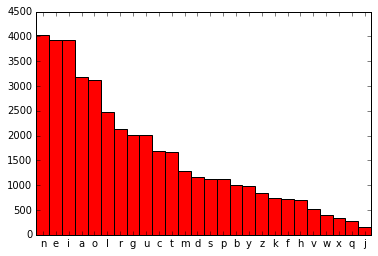

In [5]:
alphab = train_data['Prediction'].value_counts().index
frequencies = train_data['Prediction'].value_counts()

pos = np.arange(len(alphab))
width = 1.0     # gives histogram aspect to the bar diagram

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(alphab)

plt.bar(pos, frequencies, width, color='r')
plt.show()

### Plot the Images

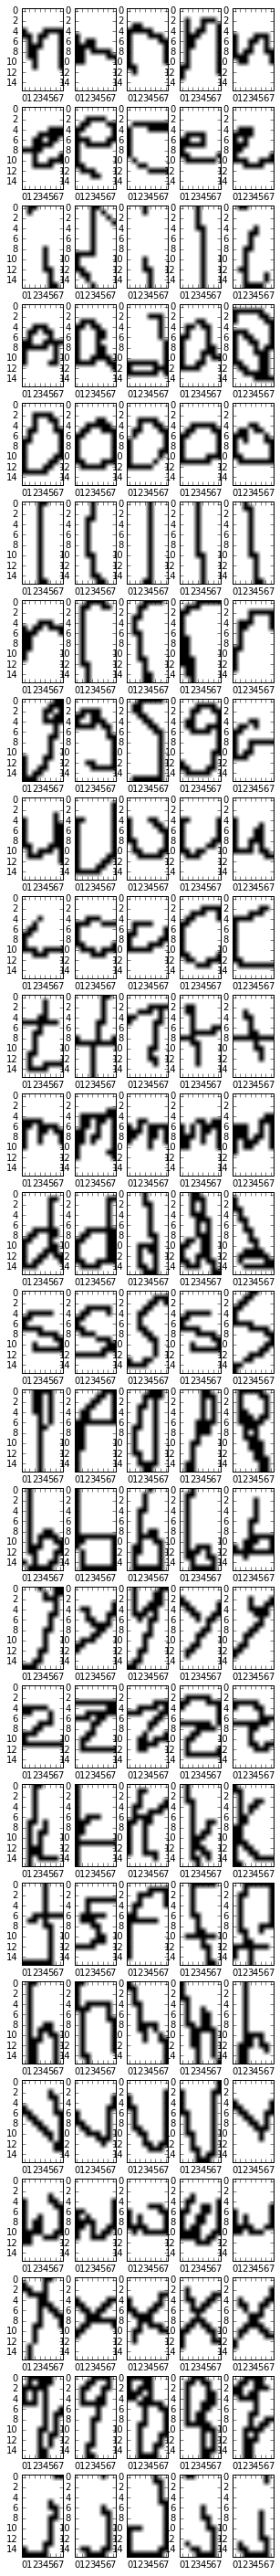

In [6]:
fig, ax = plt.subplots(nrows=26, ncols=5, figsize=(5, 50))
counter = 0
for i, row in enumerate(ax):
        for col in row:
                char = alphab[i]
                d = train_data[train_data.Prediction == char]
                ran = np.random.randint(d.shape[0])
                im = d.filter(regex=("p.*")).iloc[[ran]].as_matrix().reshape(16,8)
                col.imshow(im, cmap='Greys')
plt.show()

### Encoding

In [7]:
Y = pd.get_dummies(train_data, columns=['Prediction']).filter(regex="Prediction")

### Train test split and remove unreqired columns from X

In [8]:
_test_size = .2
X_train, X_test, y_train, y_test = train_test_split(train_data, Y, test_size = _test_size)
X_train = X_train.drop(['Prediction'],axis=1)
X_test = X_test.drop(['Prediction'],axis=1)

41244    a
35174    b
33862    e
32392    i
1486     m
36737    s
5603     r
32355    k
32208    k
30777    l
39964    e
28292    o
14289    n
8690     a
39292    e
13916    s
23059    p
9982     o
15617    t
6786     n
29583    g
21970    c
19596    r
40903    u
27719    i
846      o
28814    o
28535    o
25727    c
24711    g
        ..
7833     g
3857     g
35208    b
28286    l
18052    o
29615    t
7842     i
9999     w
3814     n
30093    g
6190     g
38776    i
30689    o
41265    e
26901    c
41533    u
783      o
38598    l
13892    s
20389    d
39121    a
41299    i
39305    h
34181    a
40356    e
26731    t
27688    o
13326    e
16019    n
15923    n
Name: Prediction, Length: 33254, dtype: object


In [9]:
print X_train.shape, y_train.shape, X_test.shape, y_test.shape

(33254, 131) (33254, 26) (8314, 131) (8314, 26)


In [10]:
print X_train.head()
print y_train.head()

          Id  NextId  Position  p_0_0  p_0_1  p_0_2  p_0_3  p_0_4  p_0_5  \
5439    6789    6790         9      0      0      0      0      0      0   
29392  36744   36745         2      0      0      0      0      0      0   
34927  43929   43930         1      0      0      0      0      0      0   
24524  30234   30235         2      0      0      0      0      0      0   
11654  14568   14569         6      0      0      0      0      0      0   

       p_0_6   ...    p_14_6  p_14_7  p_15_0  p_15_1  p_15_2  p_15_3  p_15_4  \
5439       0   ...         0       0       0       0       0       0       0   
29392      0   ...         0       0       0       0       0       0       0   
34927      0   ...         0       0       0       0       0       0       0   
24524      0   ...         0       0       0       0       0       0       0   
11654      0   ...         0       0       0       0       0       0       0   

       p_15_5  p_15_6  p_15_7  
5439        0       0       0 

### Enough of data exploration, lets save the train and test data to be further used by the models

In [10]:
X_train.to_csv("./data/X_train.csv")
y_train.to_csv("./data/y_train.csv")
X_test.to_csv("./data/X_test.csv")
y_test.to_csv("./data/y_test.csv")